# 1. Data Acquisition

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import recall_score,precision_score,f1_score,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('bank.csv',sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
#find the shape of the data
df.shape

(4521, 17)

# 2. Exploratory Data Analysis

#### 1. find missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


* No missing values found

#### 2. Find feature with one value

In [6]:
for column in df.columns:
    print(column,df[column].nunique())

age 67
job 12
marital 3
education 4
default 2
balance 2353
housing 2
loan 2
contact 3
day 31
month 12
duration 875
campaign 32
pdays 292
previous 24
poutcome 4
y 2


* No feature with one value

#### 3. Explore categorical features

In [7]:
categorical_features = [feature for feature in df.columns if ((df[feature].dtypes =='object') & (feature !='y'))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

#### 4. finding categorical feature distribution

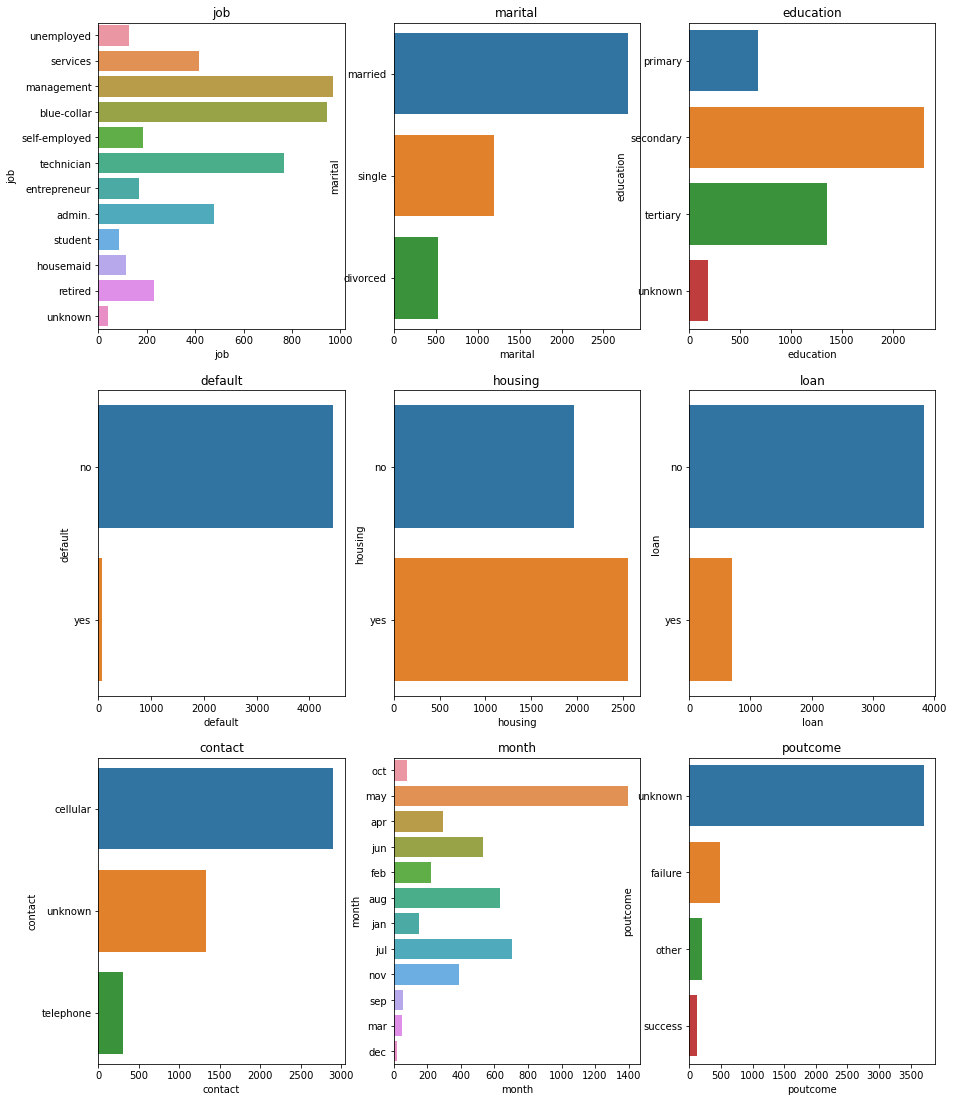

In [8]:
plt.figure(figsize=(15,80),facecolor='white')
plotnumber=1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()


* Client having job type as management are higher in number.
* Married are higher compared with others
* Client having education background as secondary are high in numbers
* Client having housing loan are larger in numbers



#### 5. Relation between categorical feature and label

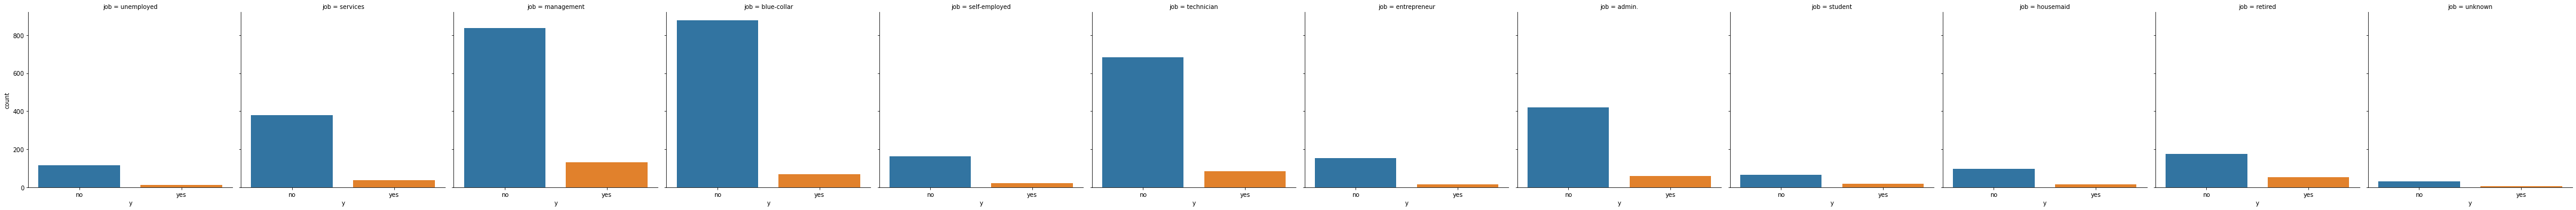

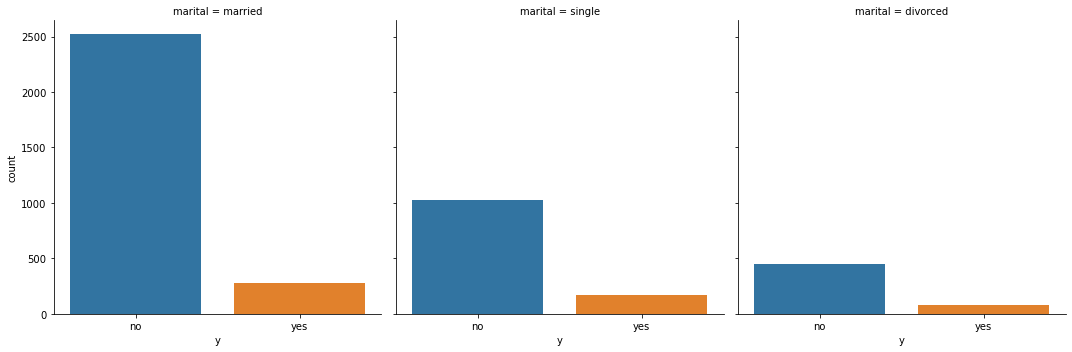

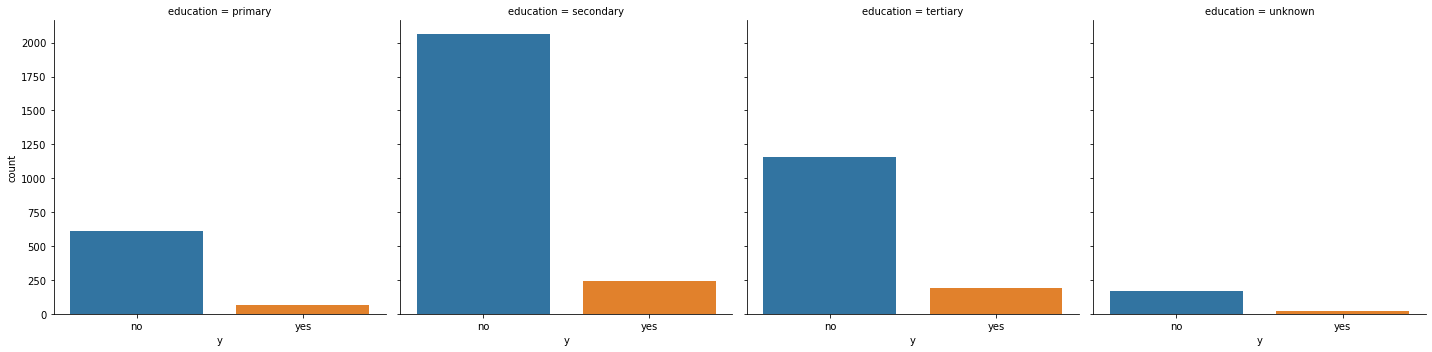

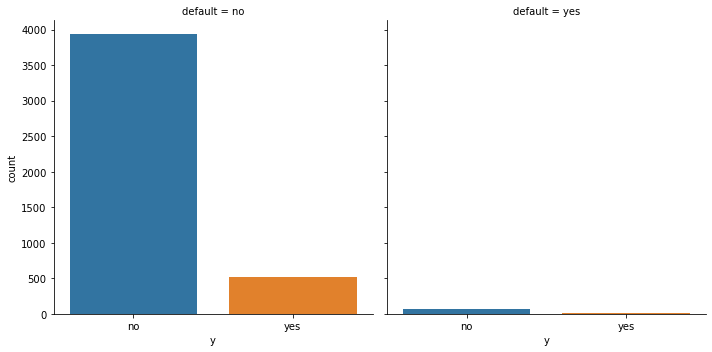

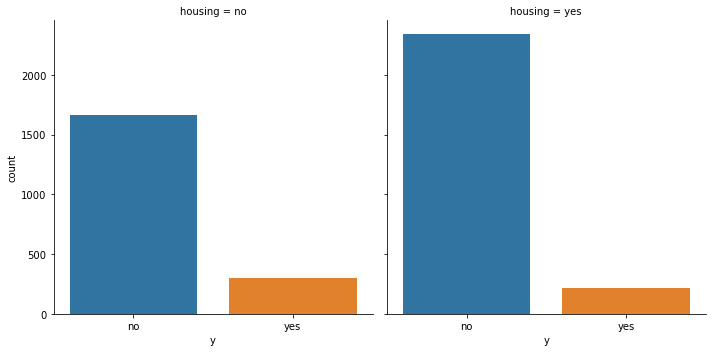

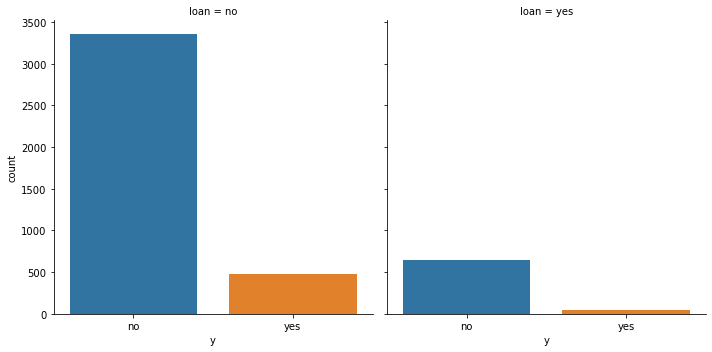

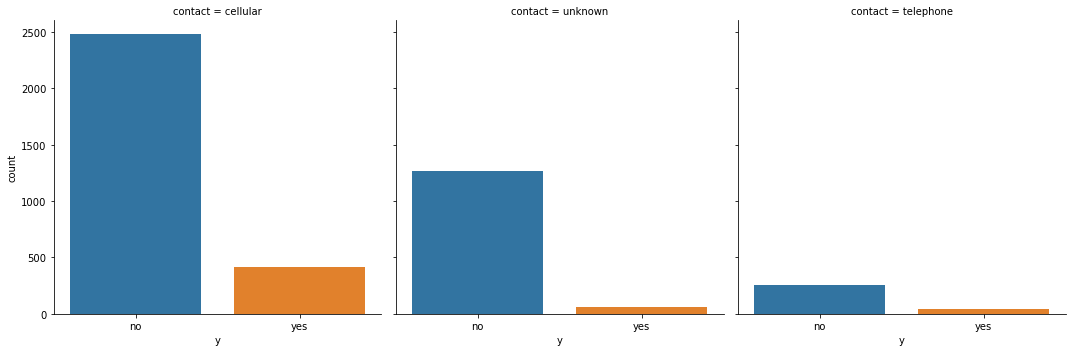

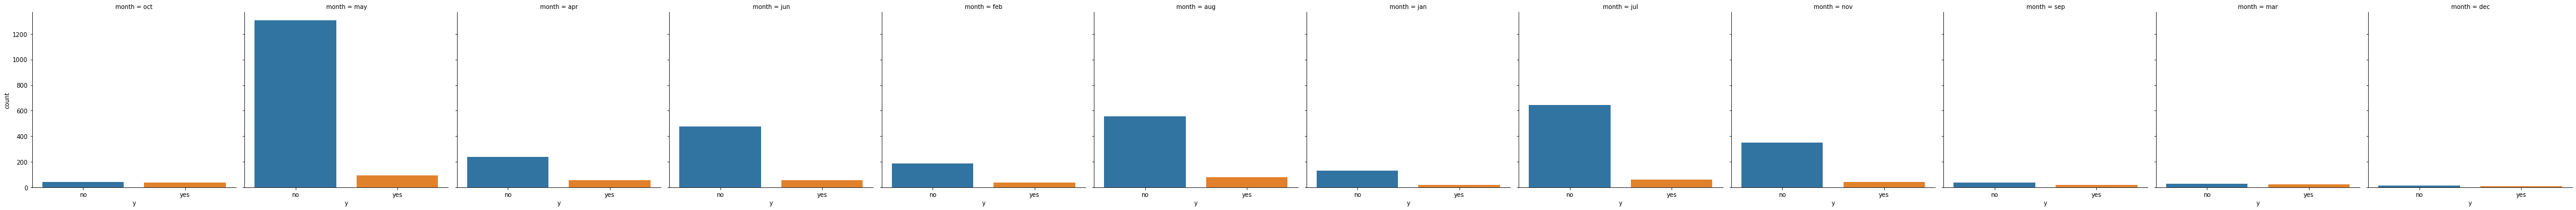

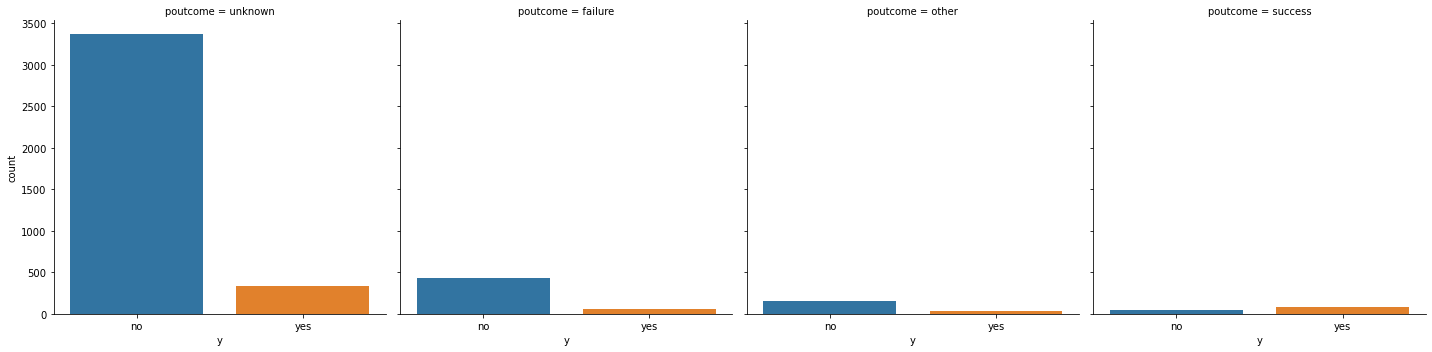

In [9]:
for categorical_feature in categorical_features:
    sns.catplot(x='y',col=categorical_feature,kind='count',data=df)

#### 6 Explore numerical features


In [10]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes =='int64') & (feature !='y'))]
numerical_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

#### 7. Relation between numerical features and Labels

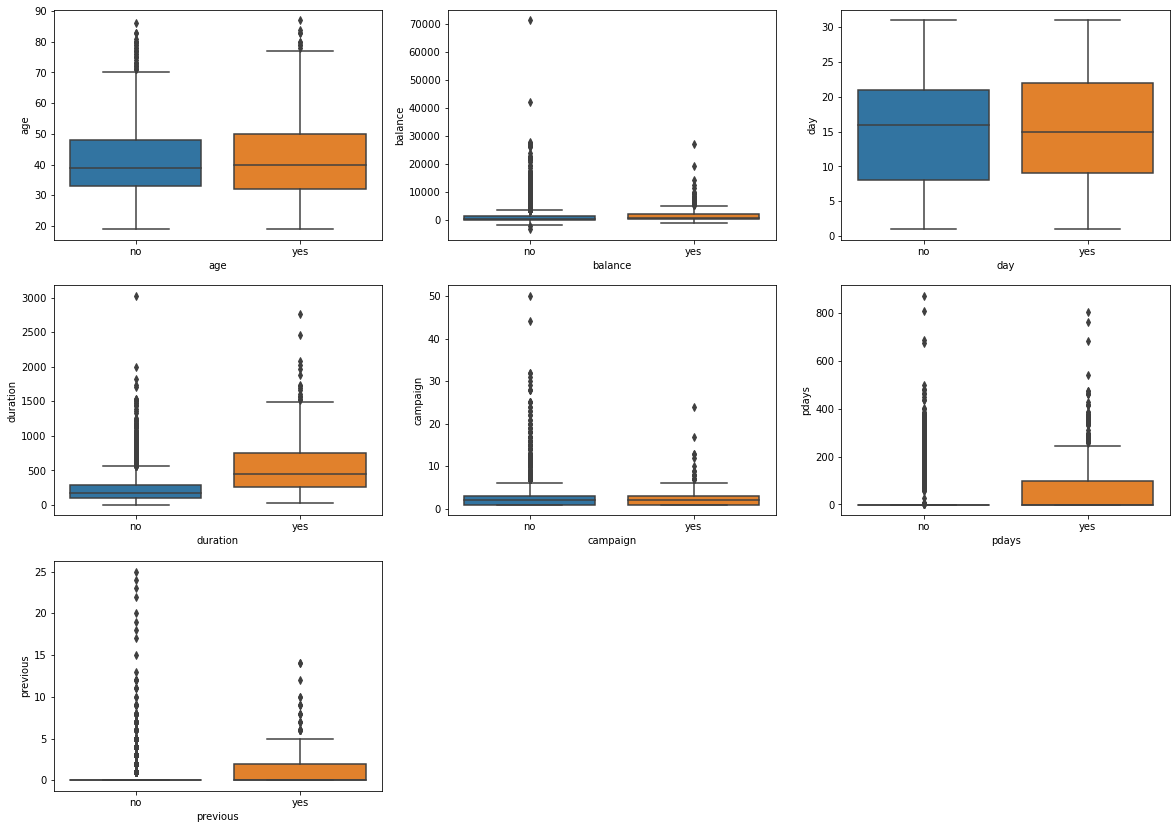

In [11]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x='y',y=df[numerical_feature],data=df)
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

* Clients who are previously contacted shown larger interests in deposits
* Clients who discussed for longer duration are more interested in deposits
* Clients with higher pdays shown more interest in deposits

#### 8. Correlation between  features

First we have to convert all categorical feature into numeric one for analysis purpose. We use label encoding & one hot encoding for that


In [12]:
df=pd.get_dummies(df,columns=['marital','poutcome','contact','default','housing','loan','y'],drop_first=True)

<AxesSubplot:>

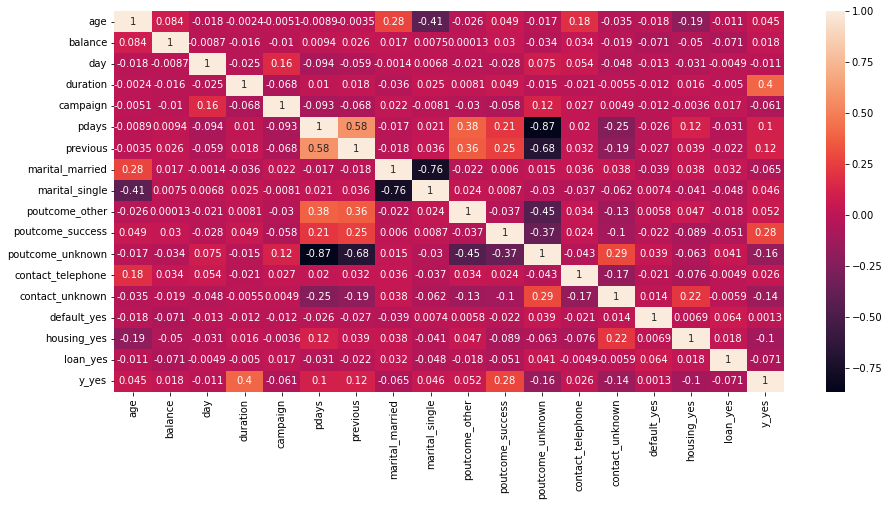

In [13]:
cor_mat = df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

* Now we will drop all features whose correlation is very close to zero in Feature Engineering step

#### 9. Checking with Label data

In [14]:
df['y_yes'].value_counts()

0    4000
1     521
Name: y_yes, dtype: int64

* Here our label data is highly imbalanced so we have to stratify the samples while splitting

# 3. Feature Engineering

#### 1. Dropping all less relevent feature from the dataset

In [15]:
df.drop(columns=['age','balance','day','campaign','marital_married','marital_single','default_yes'],inplace=True)

In [16]:
df.head()

,job,education,month,duration,pdays,previous,poutcome_other,poutcome_success,poutcome_unknown,contact_telephone,contact_unknown,housing_yes,loan_yes,y_yes
0,unemployed,primary,oct,79,-1,0,0,0,1,0,0,0,0,0
1,services,secondary,may,220,339,4,0,0,0,0,0,1,1,0
2,management,tertiary,apr,185,330,1,0,0,0,0,0,1,0,0
3,management,tertiary,jun,199,-1,0,0,0,1,0,1,1,1,0
4,blue-collar,secondary,may,226,-1,0,0,0,1,0,1,1,0,0


#### 2. Converting all remaining categorical features into numerical feature

In [17]:
df=pd.get_dummies(df,columns=['job','education','month'],drop_first=True)

In [18]:
df.head()

,duration,pdays,previous,poutcome_other,poutcome_success,poutcome_unknown,contact_telephone,contact_unknown,housing_yes,loan_yes,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,79,-1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,220,339,4,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
2,185,330,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,199,-1,0,0,0,1,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
4,226,-1,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0


# 4. Data Splitting

#### 1.Splitting the dataset into feature and Label

In [19]:
x=df.drop(['y_yes'],axis=1)
y=df['y_yes']

#### 2.Standardization

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

#### 3.Splitting the dataset into train & test data with stratified sampling

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

In [22]:
y_train.value_counts(normalize=True)*100

0    88.46792
1    11.53208
Name: y_yes, dtype: float64

In [23]:
y_test.value_counts(normalize=True)*100

0    88.508287
1    11.491713
Name: y_yes, dtype: float64

* Now our train test data contain a fair share of both these categories.

# 5. Model Training & Evaluation

#### 1. Using Logistic Regression Algorithm

In [24]:
from sklearn.linear_model import LogisticRegression
classifier1=LogisticRegression(random_state=0)
classifier1.fit(x_train,y_train)
y_pred1=classifier1.predict(x_test)

#Performance Metrics
print('For Logistic Regression Model')
print("-"*50)
lr = pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,2)))
print(lr)
print("-"*50)
print("Accuracy - ", accuracy_score(y_test,y_pred1))
print("Precision - ", precision_score(y_test,y_pred1))
print("Recall - ", recall_score(y_test,y_pred1))
print("F1 score - ", f1_score(y_test,y_pred1))

#Checking with cross validation
mean_accuracy = cross_val_score(classifier1,x,y,cv=100,scoring='accuracy').mean()
print('Mean Accuracy using cross validation - ',mean_accuracy)

For Logistic Regression Model
--------------------------------------------------
     0   1
0  785  16
1   65  39
--------------------------------------------------
Accuracy -  0.9104972375690608
Precision -  0.7090909090909091
Recall -  0.375
F1 score -  0.4905660377358491
Mean Accuracy using cross validation -  0.9021062801932369


#### 2. Using Random Forest Algorithm

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier2=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
classifier2.fit(x_train,y_train)
y_pred2=classifier2.predict(x_test)

#Performance Metrics
print('For Random Forest Model')
print("-"*50)
lr = pd.DataFrame(confusion_matrix(y_test,y_pred2),columns=list(range(0,2)))
print(lr)
print("-"*50)
print("Accuracy - ", accuracy_score(y_test,y_pred2))
print("Precision - ", precision_score(y_test,y_pred2))
print("Recall - ", recall_score(y_test,y_pred2))
print("F1 score - ", f1_score(y_test,y_pred2))

#Checking with cross validation
mean_accuracy = cross_val_score(classifier2,x,y,cv=100,scoring='accuracy').mean()
print('Mean Accuracy using cross validation - ',mean_accuracy)

For Random Forest Model
--------------------------------------------------
     0   1
0  769  32
1   73  31
--------------------------------------------------
Accuracy -  0.8839779005524862
Precision -  0.49206349206349204
Recall -  0.2980769230769231
F1 score -  0.3712574850299401
Mean Accuracy using cross validation -  0.8901739130434785


#### 3. Using Gradient Boosting Algorithm

In [26]:
from xgboost import XGBClassifier
classifier3=XGBClassifier(n_estimators=100,objective='binary:logistic',learning_rate=0.1)
classifier3.fit(x_train,y_train)
y_pred3=classifier3.predict(x_test)

#Performance Metrics
print('For Gradient Boost Model')
print("-"*50)
lr = pd.DataFrame(confusion_matrix(y_test,y_pred3),columns=list(range(0,2)))
print(lr)
print("-"*50)
print("Accuracy - ", accuracy_score(y_test,y_pred3))
print("Precision - ", precision_score(y_test,y_pred3))
print("Recall - ", recall_score(y_test,y_pred3))
print("F1 score - ", f1_score(y_test,y_pred3))

#Checking with cross validation
mean_accuracy = cross_val_score(classifier3,x,y,cv=100,scoring='accuracy').mean()
print('Mean Accuracy using cross validation - ',mean_accuracy)

For Gradient Boost Model
--------------------------------------------------
     0   1
0  777  24
1   68  36
--------------------------------------------------
Accuracy -  0.8983425414364641
Precision -  0.6
Recall -  0.34615384615384615
F1 score -  0.43902439024390244
Mean Accuracy using cross validation -  0.9018357487922706


#### 4. Evaluation using ROC AUC Curve

In [27]:
#calculating predicted probabilities for every model
log_reg = classifier1.predict_proba(x_test)
rf_cls = classifier2.predict_proba(x_test)
gb_cls = classifier3.predict_proba(x_test)

#probabilities for positive outcome 
log_reg = log_reg[:,1]
rf_cls = rf_cls[:,1]
gb_cls = gb_cls[:,1]

#calculating roc_auc score for each model
log_reg_auc = roc_auc_score(y_test,log_reg)
rf_auc = roc_auc_score(y_test,rf_cls)
gb_auc = roc_auc_score(y_test,gb_cls)
print("ROC-AUC score for Logistic Regression Model is",log_reg_auc)
print("ROC-AUC score for Random Forest Model is",rf_auc)
print("ROC-AUC score for Gradient Boost Model is",gb_auc)

ROC-AUC score for Logistic Regression Model is 0.8816623451454911
ROC-AUC score for Random Forest Model is 0.8746878901373284
ROC-AUC score for Gradient Boost Model is 0.8702703351579755


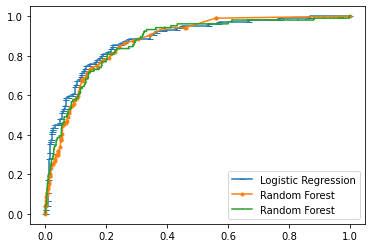

In [28]:
#calculating ROC Curve
log_reg_fpr,log_reg_tpr, _ = roc_curve(y_test,log_reg)
rf_fpr,rf_tpr, _=  roc_curve(y_test,rf_cls)
gb_fpr,gb_tpr, _ = roc_curve(y_test,gb_cls)

#Plotting ROC Curve
plt.plot(log_reg_fpr,log_reg_tpr,marker='_',label='Logistic Regression')
plt.plot(rf_fpr,rf_tpr,marker='.',label='Random Forest')
plt.plot(gb_fpr,gb_tpr,marker=',',label='Random Forest')
plt.legend()
plt.show()

By comparing all three model we can conclude that :
- Logistic Regression model has slightly better (90.21%) cross validation accuracy as compared with other
- Logistic Regression also has slightly more (88.16%) AUC with respect to other

So finally we have slected **Logistic Regression** as the best model for our problem 

# 6. Model Optimization

 Some outliers are there in numerical columns like duration & previous so model performance could be improved if these outliers are handled intelligently.
 